In [392]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import math
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,4)

In [413]:
Fs = 20000 #sampling freq. in hz
Fc = 5000 #frequency of carrier signal
baud_rate = 1000 #need to be less than Fc
data_size = 160 * 8 #160 bytes of text
T = (data_size/baud_rate) #length in sec
sample_per_bit = int(Fs/baud_rate)
print(T)
print(sample_per_bit)

1.28
20


In [414]:
#arbitray data
data = np.random.randint(low = 0, high = 2, size = data_size) 
print(data)

[0 0 0 ... 0 0 1]


In [415]:
#upsample data :
data_tx = np.repeat(data,sample_per_bit)
#modulate carrier with data :
tx_signal = np.sin(np.arange(0, len(data_tx)) * data_tx * 2 *np.pi * (Fc/Fs))

<StemContainer object of 3 artists>

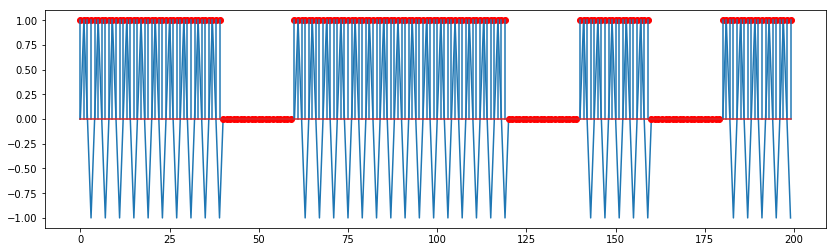

In [416]:
#plot first samples of tx_signal
plt.plot(tx_signal[100:300])
plt.stem(data_tx[100:300],markerfmt = 'ro')

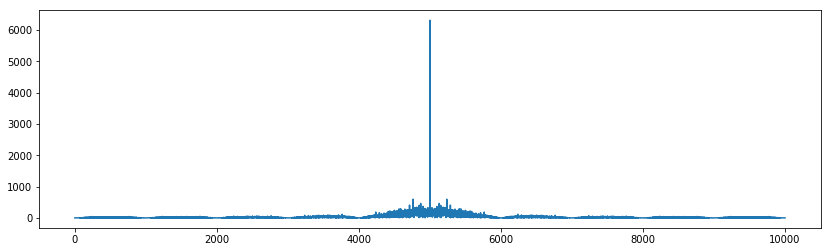

In [417]:
tx_fft = np.abs(np.fft.fft(tx_signal))
N = int(len(tx_fft)/2)
plt.plot(np.linspace(0,1,N) * (Fs/2), tx_fft[0:N]);

<StemContainer object of 3 artists>

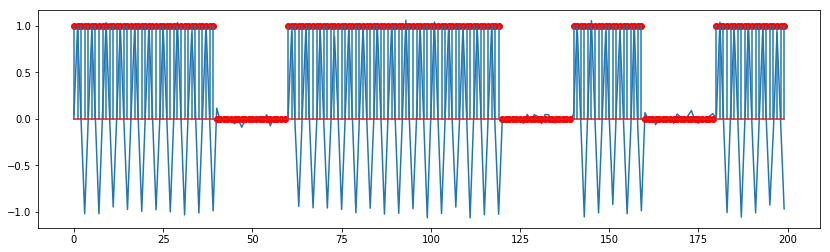

In [424]:
plt.plot(rx_signal[100:300])
plt.stem(data_tx[100:300],markerfmt = 'ro')

In [422]:
# channel
rx_signal = tx_signal
noise = noise = np.random.normal(0,0.05,len(rx_signal))
rx_signal = tx_signal + noise

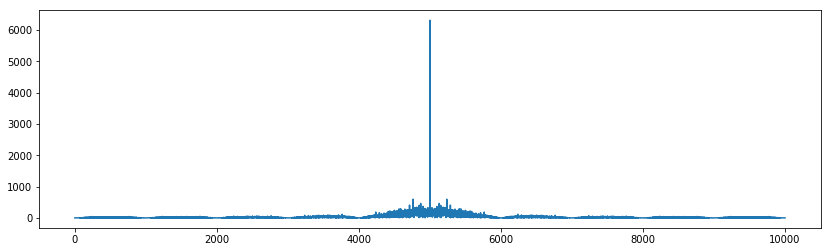

In [423]:
rx_fft = np.abs(np.fft.fft(rx_signal))
plt.plot(np.linspace(0,1,N) * (Fs/2), tx_fft[0:N]);

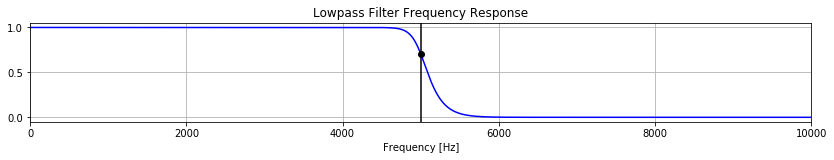

In [421]:
#lowpass filter
def butter_lowpass(cutoff, fs, order=20):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = sp.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = sp.lfilter(b, a, data)
    return y


# Filter requirements.
order = 20
fs = Fs   # sample rate, Hz
cutoff = 5000  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = sp.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()